In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [118]:
dataset = load_breast_cancer()
data = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
data['diagnosis'] = dataset.target

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [120]:
data['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [121]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [122]:
data.groupby('diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [124]:
X = data.drop(columns = ["diagnosis"], axis = 1).values
Y = data["diagnosis"].values

In [125]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, stratify = Y, test_size = 0.2, random_state = 5)

In [126]:
xTrain.shape

(455, 30)

Neural Network:

In [127]:
import tensorflow as tf
tf.random.set_seed(3)  # Similar to random_state
from tensorflow import keras

In [128]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [129]:
#setting up the layers of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30, )),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

#1Input (No of features)
#2Hidden (No. of neurons, activation function)
#3Output (No. of neurons, activation function)

c:\Users\Tarun V\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
#Compling the neural network
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [131]:
#Training the neural network
histroy = model.fit(xTrain, yTrain, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3457 - loss: 0.9576 - val_accuracy: 0.6957 - val_loss: 0.5328
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7404 - loss: 0.6073 - val_accuracy: 0.8478 - val_loss: 0.3566
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8626 - loss: 0.4216 - val_accuracy: 0.9348 - val_loss: 0.2673
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8900 - loss: 0.3246 - val_accuracy: 0.9565 - val_loss: 0.2177
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9123 - loss: 0.2672 - val_accuracy: 0.9565 - val_loss: 0.1866
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9266 - loss: 0.2287 - val_accuracy: 0.9783 - val_loss: 0.1647
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9403 - loss: 0.2007 - val_accuracy: 0.9783 - val_loss: 0.1479
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9573 - loss: 0.1793 - val_accuracy: 0.9783 - val_loss

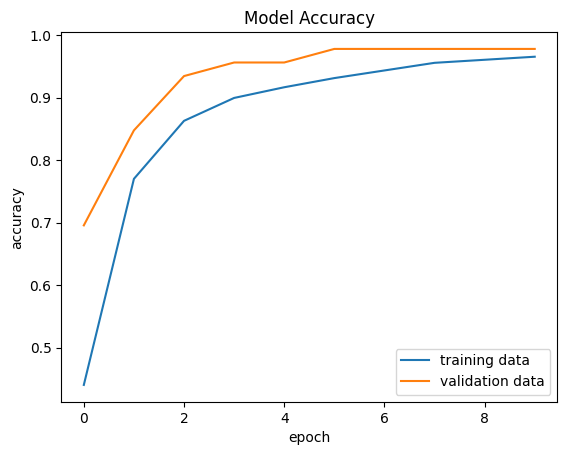

In [132]:
#Visualization accuracy and loss

plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])

plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

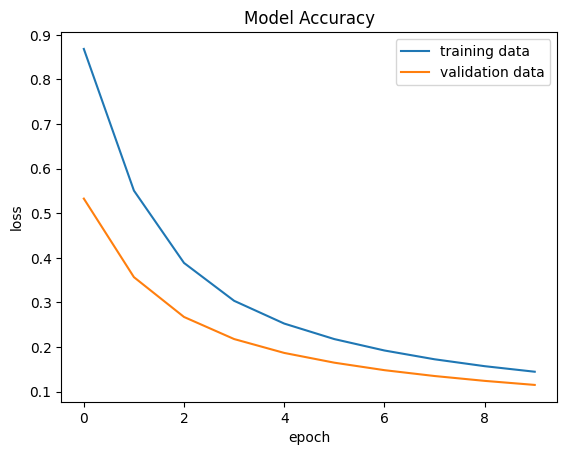

In [133]:
#Visualization accuracy and loss

plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])

plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend(['training data', 'validation data'], loc = 'upper right')
plt.show()

In [134]:
#Accuracy value for train data

loss, accuracy = model.evaluate(xTrain, yTrain)
print("Accuracy:" , accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.1487 
Accuracy: 0.9692307710647583


In [135]:
#Accuracy value for test data

loss, accuracy = model.evaluate(xTest, yTest)
print("Accuracy:" , accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9780 - loss: 0.1078
Accuracy: 0.9736841917037964


In [136]:
yPrediction = model.predict(xTest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [137]:
print(yPrediction.shape)
print(yPrediction)

(114, 2)
[[8.04617628e-02 8.48977566e-01]
 [1.94716945e-01 7.30129719e-01]
 [7.39353597e-02 7.74439633e-01]
 [4.20433208e-02 8.41019630e-01]
 [7.75813172e-03 7.64728785e-01]
 [9.59343240e-02 8.10487688e-01]
 [2.29758874e-01 2.57117569e-01]
 [6.63285851e-01 1.39849991e-01]
 [9.02834609e-02 8.47197294e-01]
 [3.92147273e-01 4.61455733e-02]
 [9.71971512e-01 2.87322197e-02]
 [7.33478218e-02 5.04802883e-01]
 [4.86672163e-01 2.81709373e-01]
 [2.10083708e-01 7.88663983e-01]
 [5.90301380e-02 7.99268484e-01]
 [1.28848162e-02 8.96977544e-01]
 [3.58474314e-01 4.63324152e-02]
 [3.72184008e-01 1.96361989e-02]
 [4.57662016e-01 3.26163322e-02]
 [8.53914261e-01 1.37153047e-03]
 [7.14884698e-02 9.15025532e-01]
 [2.08742842e-01 1.10911421e-01]
 [1.02633394e-01 7.11866617e-01]
 [2.37980470e-01 3.44412208e-01]
 [4.02388513e-01 6.01326525e-01]
 [3.57481331e-01 1.72946826e-01]
 [8.68724227e-01 2.35722354e-03]
 [3.20384689e-02 7.68550634e-01]
 [1.94220692e-02 4.66623306e-01]
 [8.14531326e-01 2.00421340e-03]
 

In [138]:
#model.predict - probability of each class

#Converting probability to labels

yPrediction_labels = [np.argmax(i) for i in yPrediction]
yPrediction_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0]

In [139]:
#Checking with sklearn accuracy
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(yTest, yPrediction_labels)
print(accuracy1)

0.9736842105263158


In [140]:
#Predictive system

input = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
input =(12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.044,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875)

input = np.asarray(input).reshape(1, -1)

input = scaler.transform(input)


prediction = model.predict(input)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[1]
